It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [71]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv",low_memory=False)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**Features V1, V2, ... V28** are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. **Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. **The feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
len(df)
df['Time'].unique()

In [ ]:
df.head(50)

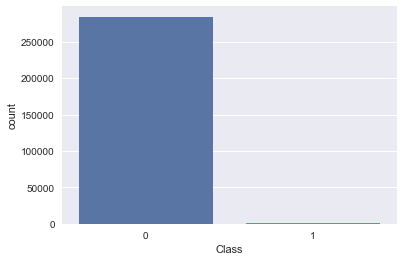

In [72]:
sns.countplot(x = 'Class', data = df)


Creating a time bin to use time as a categorical variable:

In [7]:
day = 3600 * 24
day

df['day']=(df.Time > day)+1

len(df[df.day==1])
len(df[df.day==2])

86400

144787

140020

In [8]:
df['Time_day']=df.Time.apply(lambda x: x if x<=day else x-day)

In [9]:
df['Time_cluster']=pd.cut(df.Time_day,bins=24)

In [10]:
df.groupby('Time_cluster').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,Time_day
Time_cluster,,,,,,,,,,,,,,,,,,,,,
"(-86.4, 3600.0]",7695,7695,7695,7695,7695,7695,7695,7695,7695,7695,...,7695,7695,7695,7695,7695,7695,7695,7695,7695,7695
"(3600.0, 7200.0]",4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,...,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222
"(7200.0, 10800.0]",3326,3326,3326,3326,3326,3326,3326,3326,3326,3326,...,3326,3326,3326,3326,3326,3326,3326,3326,3326,3326
"(10800.0, 14400.0]",3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,...,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
"(14400.0, 18000.0]",2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,...,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
"(18000.0, 21600.0]",2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990
"(21600.0, 25200.0]",4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,...,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102
"(25200.0, 28800.0]",7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,...,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242
"(28800.0, 32400.0]",10275,10275,10275,10275,10275,10275,10275,10275,10275,10275,...,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275


In [15]:
df_new = df.drop(['Time','day','Time_day'], axis=1)
df_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_cluster
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,"(82800.0, 86400.0]"
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,"(82800.0, 86400.0]"
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,"(82800.0, 86400.0]"
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,"(82800.0, 86400.0]"
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,"(82800.0, 86400.0]"


In [16]:
df_new = pd.get_dummies(df_new)

In [17]:
df_new.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'Amount', u'Class', u'Time_cluster_(-86.4, 3600.0]',
       u'Time_cluster_(3600.0, 7200.0]', u'Time_cluster_(7200.0, 10800.0]',
       u'Time_cluster_(10800.0, 14400.0]', u'Time_cluster_(14400.0, 18000.0]',
       u'Time_cluster_(18000.0, 21600.0]', u'Time_cluster_(21600.0, 25200.0]',
       u'Time_cluster_(25200.0, 28800.0]', u'Time_cluster_(28800.0, 32400.0]',
       u'Time_cluster_(32400.0, 36000.0]', u'Time_cluster_(36000.0, 39600.0]',
       u'Time_cluster_(39600.0, 43200.0]', u'Time_cluster_(43200.0, 46800.0]',
       u'Time_cluster_(46800.0, 50400.0]', u'Time_cluster_(50400.0, 54000.0]',
       u'Time_cluster_(54000.0, 57600.0]', u'Time_cluster_(57600.0, 61200.0]',
       u'Time_cluster_(61200.0, 64800.0]', u'Time_cluster_(64800.0, 68400.

Splitting the data into train, val and test set:

In [20]:
X = df_new.drop(['Class'], axis=1)
y = df_new.Class

len(X)
len(y)

284807

284807

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
def train_val_test_split(X,y,test_size,val_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=0, test_size = test_size, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0, test_size = val_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [23]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y,test_size=0.12221,val_size=0.2)

In [24]:
len(X_train)
len(X_val)
len(X_test)
len(y_train)
len(y_val)
len(y_test)

##non null values
y_train.sum()
y_val.sum()
y_test.sum()

222360

55591

5307

222360

55591

5307

346

86

8

Now you can use X_train and y_train for training, X_val and y_val for validation and X_test and y_test for testing.

Note: for oversampling I suggest to use the package imblearn. Here is the installation guide: https://pypi.org/project/imbalanced-learn/

A sample code to use this (I didn't test the code, I just put it here for reference):

In [27]:
pip install U imbalanced learn

SyntaxError: invalid syntax (<ipython-input-27-e62cdb060abe>, line 1)

In [34]:
#!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/7a/63/416529a405262610350b92b949b3aede55a032e4f5ab94fbbfce82883ee6/imbalanced-learn-0.3.3.tar.gz
  Running setup.py install for imbalanced-learn: started
    Running setup.py install for imbalanced-learn: finished with status 'done'


You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:

from imblearn.over_sampling import SMOTE

In [37]:

#ref:http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape {}'.format(Counter(y)))
#Original dataset shape Counter({1: 900, 0: 100})

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))
#Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})



We will try to use this resampled data to train our model,then we will use this model to predict for our original data

In [48]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X_res,y_res,test_size=0.12221,val_size=0.2)
len(X_train)
len(X_val)
len(X_test)
len(y_train)
len(y_val)
len(y_test)

1264

316

220

1264

316

220

In [66]:
def scores(confusion_matrix):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    accuracy = float(TP+TN)/(TP+FP+FN+TN)
    precision = float(TP)/(TP+FP)
    recall = float(TP)/(TP+FN)
    return accuracy
    return accuracy
    return recall

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
bayes_model=gnb.fit(X_train,y_train)
y_pred=  bayes_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix_bayes
print(confusion_matrix_bayes)

array([[110,   0],
       [  1, 109]], dtype=int64)

[[110   0]
 [  1 109]]


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model =rfc.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
confusion_matrix_rfc=confusion_matrix(y_test, y_pred)
print(confusion_matrix_rfc)
scores(confusion_matrix_rfc)

[[110   0]
 [  1 109]]


0.9954545454545455

In [ ]:
RandomForestClassifier()